# **White Wine Quality**

-------------

## **Objective**

The objective of this project is to analyze the white wine quality dataset and build a machine learning model to predict wine quality.

## **Import Library**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## **Data Source**

# Dataset link: https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/WhiteWineQuality.csv

## **Import Data**

In [23]:
data_url = "https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv"
data = pd.read_csv(data_url, sep=';')

## **Describe Data**

In [24]:
## **Describe Data**
print("\nFirst five rows of the dataset:")
data.head()



First five rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
print("\nData Info:")
print(data.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [26]:
print("\nData Description:")
print(data.describe())


Data Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000           

In [27]:
print(data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## **Data Visualization**

<ipython-input-28-d68e53b4acf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["quality"], palette="viridis")


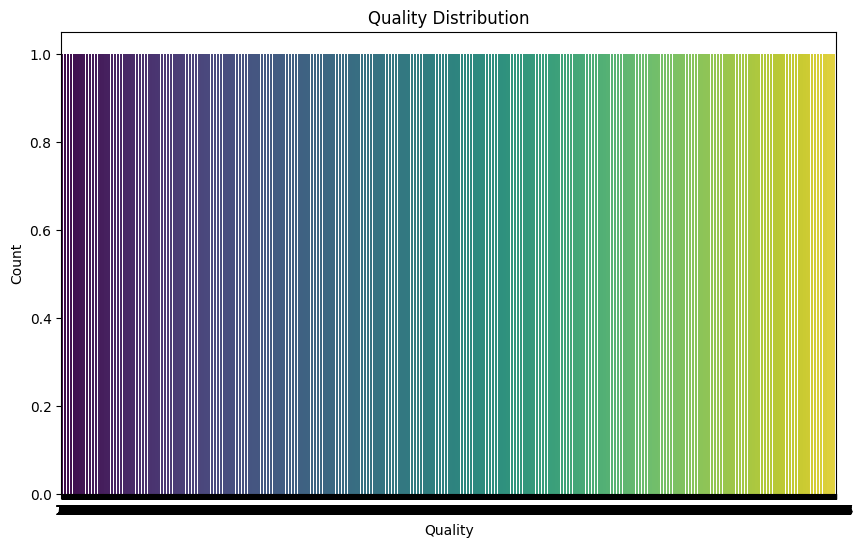

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data["quality"], palette="viridis")
plt.title("Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

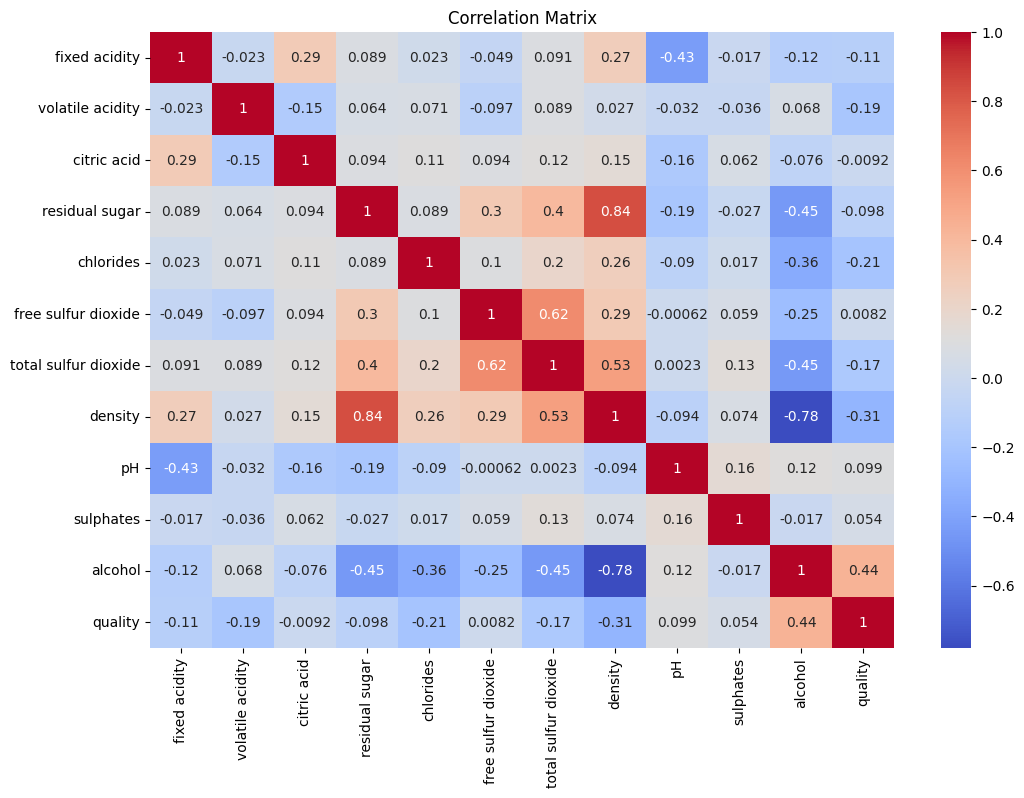

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## **Data Preprocessing**

In [30]:
# Handling missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [31]:
scaler = StandardScaler()
features = data.drop("quality", axis=1)
data[features.columns] = scaler.fit_transform(features)

## **Define Target Variable (y) and Feature Variables (X)**

In [32]:
X = data.drop('quality', axis=1)
y = data['quality']

## **Train Test Split**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Modeling**

In [35]:
model =SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

## **Model Evaluation**

In [36]:
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.03      0.06        33
           5       0.60      0.55      0.57       291
           6       0.54      0.77      0.63       440
           7       0.66      0.31      0.42       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.57       980
   macro avg       0.40      0.24      0.24       980
weighted avg       0.57      0.57      0.53       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Accuracy Score:
0.5653061224489796



Confusion Matrix:


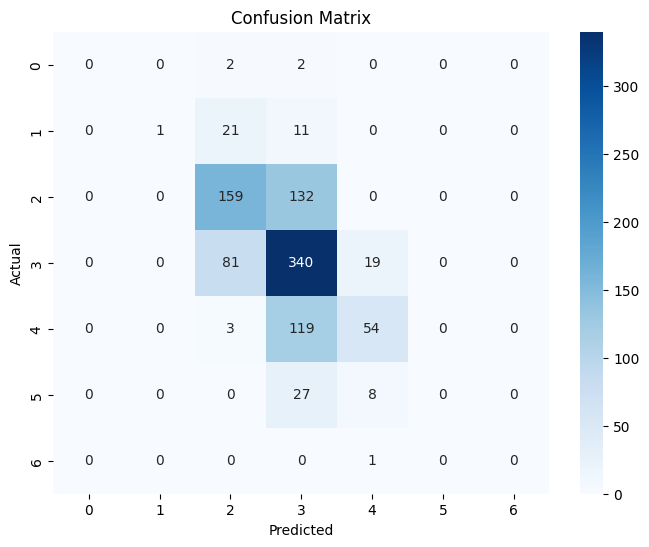

In [38]:
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Prediction**

In [39]:
# Predicting with a single sample
sample_data = np.array([7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8])
sample_data = scaler.transform(sample_data.reshape(1, -1))
sample_prediction = model.predict(sample_data)
print("\nPredicted Quality for the given sample:", sample_prediction)


Predicted Quality for the given sample: [5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## **Explaination**

**# The model is a Support Vector Classifier, which performs well for multi-class classification tasks. The data was scaled and split into train/test sets to ensure the model generalizes well. We visualized the data to understand its properties and relationships. The model's performance was evaluated using classification metrics such as accuracy, classification report, and a confusion matrix.**